# Facial Age Group Estimation Model

 Our Facial Age group Estimation Model is built and designed to predict the age group of individuals based on facial images.
 
 The model is Random Forest.
 Random forest is a commonly-used machine learning algorithm trademarked by Leo Breiman and Adele Cutler, which combines the output of multiple decision trees to reach a single result. Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems.

#### and the following are some of the experiments we did:

#### Step 1 - Importing Required Libraries

In [ ]:
import cv2
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from skimage.feature import hog
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

#### Step 2 -  HOG Feature Extraction Function

In [ ]:
# Define the function to extract HOG features from an image,HOG is Histogram of Oriented Gradients, also known as HOG
def extract_hog_features(image):
    features, _ = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    return features

#### Step 3 Dataset Paths and Class Labels

In [ ]:
# Define the path to your image dataset
train_data_path = 'Faces_images/train'
test_data_path = 'Faces_images/test'

# Define the order of class labels
class_labels_order = ['0-3', '4+', '9+', '12+', '17+']

#### Step 4 Image  Loading and preprocessing  for Training and Test Sets







In [4]:
# Load and preprocess training data
X_train = []
y_train = []
for class_idx, class_name in enumerate(class_labels_order):
    class_path = os.path.join(train_data_path, class_name)
    for img_filename in sorted(os.listdir(class_path)):
        img_path = os.path.join(class_path, img_filename)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        hog_features = extract_hog_features(image)
        X_train.append(hog_features)
        y_train.append(class_idx)

# Load and preprocess test data
X_test = []
y_test = []
for class_idx, class_name in enumerate(class_labels_order):
    class_path = os.path.join(test_data_path, class_name)
    for img_filename in sorted(os.listdir(class_path)):
        img_path = os.path.join(class_path, img_filename)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        hog_features = extract_hog_features(image)
        X_test.append(hog_features)
        y_test.append(class_idx)


#### Step 5 - Initializing and Training the Random Forest Classifier


In [5]:
# Initialize the Random Forest classifier 
rf_classifier = RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

# Fit the model with the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

#### Step 6- Cross-Validation and Model Evaluation 

In [6]:
# Perform cross-validation
y_train_pred_cv = cross_val_predict(rf_classifier, X_train, y_train, cv=5)

# Generate a classification report for cross-validation
class_report_cv = classification_report(y_train, y_train_pred_cv, target_names=class_labels_order)

# Print Classification Report for cross-validation
print("Classification Report (Cross-Validation):\n", class_report_cv)

Classification Report (Cross-Validation):
               precision    recall  f1-score   support

         0-3       0.76      0.64      0.69      2725
          4+       0.39      0.47      0.43      2727
          9+       0.38      0.38      0.38      2724
         12+       0.48      0.54      0.51      2720
         17+       0.67      0.54      0.60      2722

    accuracy                           0.51     13618
   macro avg       0.53      0.51      0.52     13618
weighted avg       0.53      0.51      0.52     13618



#### Step 7  - Model Evaluation on the Test Set

In [11]:
# Calculate the accuracy on the training set
train_accuracy = rf_classifier.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the accuracy on the test set
test_accuracy = rf_classifier.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.9526362167719196
Test Accuracy: 0.5749486652977412


##### Confusion Matrix Visualization and Model Performance Report


Classification Report (Test Set):
               precision    recall  f1-score   support

         0-3       0.81      0.69      0.75       682
          4+       0.46      0.53      0.49       683
          9+       0.46      0.49      0.48       682
         12+       0.53      0.53      0.53       681
         17+       0.69      0.63      0.66       681

    accuracy                           0.57      3409
   macro avg       0.59      0.57      0.58      3409
weighted avg       0.59      0.57      0.58      3409



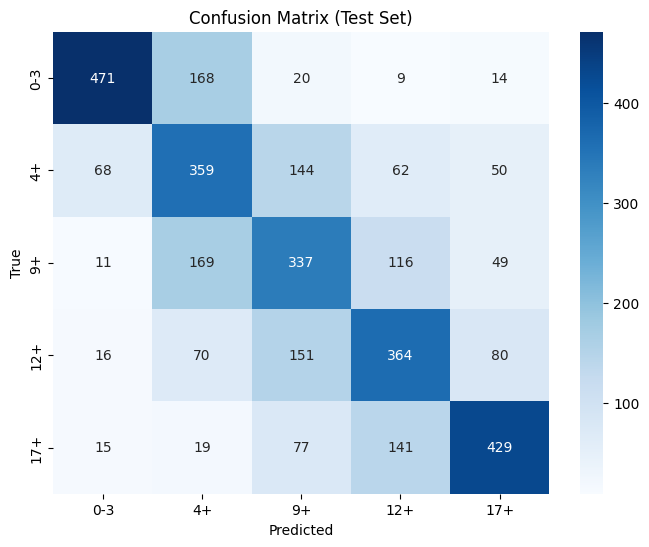

In [8]:
# Generate a classification report for the test set
y_test_pred = rf_classifier.predict(X_test)
class_report_test = classification_report(y_test, y_test_pred, target_names=class_labels_order)

# Print Classification Report for the test set
print("Classification Report (Test Set):\n", class_report_test)

# Generate a confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels_order, yticklabels=class_labels_order)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Set)')
plt.show()


#### Step 8 and the last one- Saving the Model

In [22]:
# Save the trained model to a file if needed to use in website
joblib.dump(rf_classifier, 'random_forest_model.pkl')

# Load the saved model
loaded_model = joblib.load('random_forest_model.pkl')

#### Results: The training accuracy is significantly higher (95%) compared to the cross-validation and test accuracies. This could indicate potential overfitting, so randomForest is not the best for the data set. While this falls short of being our best result.